In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from RobotSim373 import *

Version:  0.0.22


In [3]:
def build(robot):    
    
    up=Box(robot,2,2.5,width=1,height=.3,name='up')
    down=Box(robot,2,1.5,width=1,height=.3,name='down')
    center=Disk(robot,2,2,radius=0.3,name='center')
    left=Box(robot,1.3,2,width=1,height=.3,angle=90,name='left')
    right=Box(robot,2.7,2,width=1,height=.3,angle=-90,name='right')
    ram=Box(robot,3.2,2,width=.5,height=.5,name='ram',density=0)
    
    connect(up,down,'weld') 
    connect(center,down,'weld') 
    connect(up,center,'weld') 
    connect(center,left,'weld') 
    connect(left,right,'weld') 
    connect(right,ram,'weld')     
 

In [4]:
def stop(t,robot):
    robot['up'].F=0
    robot['ram'].F=0
    return True

def move_up(t,robot):
    robot['up'].F=20
    robot['up'].F_angle=90
    return False

def move_down(t,robot):
    robot['up'].F=-40
    robot['up'].F_angle=90
    return False


def until_close_to_wall(t,robot):
    d=robot['left'].read_distance()
    if d<1.5:
        return True
    else:
        return False
    
def until_close_to_floor(t,robot):
    d=robot['right'].read_distance()
    if d<1.5:
        return True
    else:
        return False

def wait(dt):
    
    def _wait(t,robot):
        if t<dt:
            return False
        else:
            return True
        
    return _wait
    
    
def spawn(t,robot):
    
    robot.env -= "me"
        
    b=Box(robot.env,x=5,y=robot['center'].y,width=.5,height=0.5,name='me')
    b.F=2
    b.F_angle=(2*rand()-1)*90
    
    return True

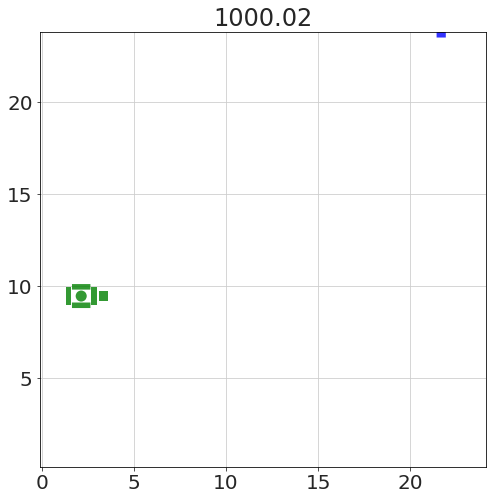

In [5]:
env=Environment(width=24,    # for consistency, manually set the environment size
        height=24,
linearDamping=20) 
robot=Robot(env)
build(robot)

state_machine=StateMachine(
    {
     'move up':([move_up,until_close_to_wall],'spawn'),
     'spawn':([spawn],'move down'),
     'move down':([move_down,until_close_to_floor],'move up'),
    },
    first_state='move up')
robot.controller=Controller(robot,state_machine)

run_sim(env,robot.controller,
        total_time=1000,  # seconds
        dt=1/60,
        dt_display=5,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )    